#### 자연언어처리(NLP:Natural Language PRocessing,)
- nltk
- konlpy

In [3]:
# pip install konlpy
from konlpy.tag import Kkma
kkma = Kkma()

C:\ProgramData\Anaconda3\lib\site-packages\jpype\_core.py:210: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)


In [4]:
kkma.sentences('한국어 분석을 시작합니다 재미있어요~~')

['한국어 분석을 시작합니다', '재미있어요~~']

In [5]:
kkma.nouns('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석']

In [6]:
kkma.pos('한국어 분석을 시작합니다 재미있어요~~')

[('한국어', 'NNG'),
 ('분석', 'NNG'),
 ('을', 'JKO'),
 ('시작하', 'VV'),
 ('ㅂ니다', 'EFN'),
 ('재미있', 'VA'),
 ('어요', 'EFN'),
 ('~~', 'SW')]

In [7]:
from konlpy.tag import Hannanum
hannanum = Hannanum()

In [9]:
hannanum.nouns('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석', '시작']

In [10]:
hannanum.morphs('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석', '을', '시작', '하', 'ㅂ니다', '재미있', '어요', '~~']

In [11]:
hannanum.pos('한국어 분석을 시작합니다 재미있어요~~')

[('한국어', 'N'),
 ('분석', 'N'),
 ('을', 'J'),
 ('시작', 'N'),
 ('하', 'X'),
 ('ㅂ니다', 'E'),
 ('재미있', 'P'),
 ('어요', 'E'),
 ('~~', 'S')]

In [12]:
from konlpy.tag import Twitter
t = Twitter()

C:\ProgramData\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [13]:
t.nouns('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석', '시작']

In [14]:
# 형태소
t.morphs('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석', '을', '시작', '합니다', '재미있어요', '~~']

In [15]:
# 형태소 
t.pos('한국어 분석을 시작합니다 재미있어요~~')

[('한국어', 'Noun'),
 ('분석', 'Noun'),
 ('을', 'Josa'),
 ('시작', 'Noun'),
 ('합니다', 'Verb'),
 ('재미있어요', 'Adjective'),
 ('~~', 'Punctuation')]

### 워드 클라우드

In [25]:
# pip install wordcloud Pillow
from wordcloud import WordCloud, STOPWORDS
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [63]:
text = open('09. alice.txt').read()
# print(text)
alice = Image.open('09. alice_mask.png')
alice_mask = np.array(alice)

stopwords = set(STOPWORDS)
stopwords.add("said")
# stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 'ours',
 '

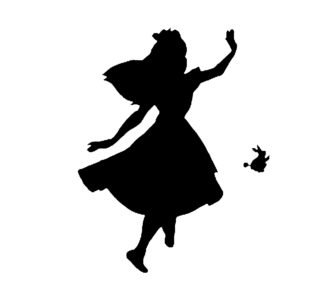

In [46]:
plt.figure(figsize=(8,8))
plt.imshow(alice_mask,cmap=plt.cm.gray,
           interpolation='bilinear')  # 흑백으로 출력, 보간법
plt.axis('off')  # x,y축을 제거
plt.show()

In [62]:
wc = WordCloud(background_color='white',max_words=2000,
              mask=alice_mask, stopwords=stopwords)
wc = wc.generate(text)
# wc.words_

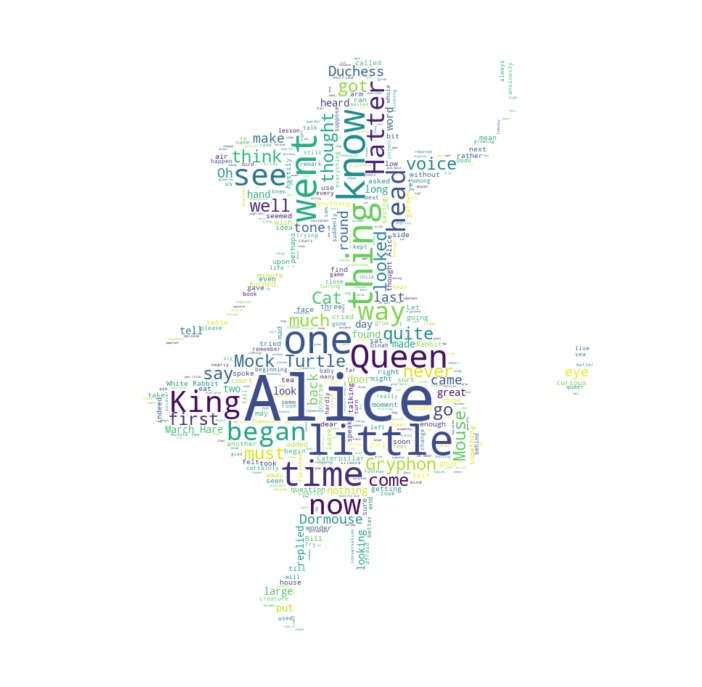

In [61]:
plt.figure(figsize=(12,12))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()

### 문장의 이해와 유사도 측정

In [68]:
from nltk.tokenize import word_tokenize
import nltk

In [86]:
train = [('i like you','pos'),
         ('i hate you','neg'),
         ('you like me','neg'),
         ('i like her','pos')]

In [90]:
# nltk.download('punkt')  # word_tokenize() 오류시 미리 실행

all_words = set(word.lower() for sentence in train 
                for word in word_tokenize(sentence[0]))

all_words # 단어를 분리 
# {'hate', 'her', 'i', 'like', 'me', 'you'}  : 말뭉치

{'hate', 'her', 'i', 'like', 'me', 'you'}

In [101]:
t = [({word:(word in word_tokenize(x[0]))  # x[0]:문장 
      for word in all_words},x[1])         # x[1]: pos/neg
             for x in train]
t
# 'i like you'
# [({'like': True,
#    'hate': False,
#    'i': True,
#    'you': True,
#    'her': False,
#    'me': False},
#   'pos'),

In [100]:
# 나이브 베이즈 분류: 문장을 학습
classifier = nltk.NaiveBayesClassifier.train(t)
classifier.show_most_informative_features()

Most Informative Features
                     her = False             neg : pos    =      1.7 : 1.0
                       i = True              pos : neg    =      1.7 : 1.0
                    like = True              pos : neg    =      1.7 : 1.0
                    hate = False             pos : neg    =      1.7 : 1.0
                     you = True              neg : pos    =      1.7 : 1.0
                      me = False             pos : neg    =      1.7 : 1.0


In [108]:
# test 데이터 사용 : 분류
# test_sentence = 'i like Jane'    #  'pos'
# test_sentence = 'i hate her'     #  'pos'
test_sentence = 'they hate him'    #  'neg'
test_sentence = 'they love him'    #  'neg'

test_sent_feautres = {word.lower():
            (word in word_tokenize(test_sentence.lower()))
                     for word in all_words}
test_sent_feautres

{'like': False,
 'hate': False,
 'i': False,
 'you': False,
 'her': False,
 'me': False}

In [109]:
classifier.classify(test_sent_feautres)

'neg'

### 문장의 이해 : 한글

In [171]:
from konlpy.tag import Twitter
pos_tagger = Twitter()

In [172]:
train = [('메리가 좋아', 'pos'), 
         ('고양이도 좋아', 'pos'),
         ('난 수업이 지루해', 'neg'),
         ('메리는 이쁜 고양이야', 'pos'),
         ('난 마치고 메리랑 놀거야', 'pos')]

In [173]:
all_words = set(word.lower() for sentence in train 
                for word in word_tokenize(sentence[0]))

all_words # 단어를 분리 

{'고양이도',
 '고양이야',
 '난',
 '놀거야',
 '마치고',
 '메리가',
 '메리는',
 '메리랑',
 '수업이',
 '이쁜',
 '좋아',
 '지루해'}

In [174]:
t = [({word:(word in word_tokenize(x[0]))  # x[0]:문장 
      for word in all_words},x[1])         # x[1]: pos/neg
             for x in train]
t

[({'이쁜': False,
   '수업이': False,
   '난': False,
   '고양이도': False,
   '놀거야': False,
   '좋아': True,
   '메리가': True,
   '고양이야': False,
   '마치고': False,
   '메리랑': False,
   '지루해': False,
   '메리는': False},
  'pos'),
 ({'이쁜': False,
   '수업이': False,
   '난': False,
   '고양이도': True,
   '놀거야': False,
   '좋아': True,
   '메리가': False,
   '고양이야': False,
   '마치고': False,
   '메리랑': False,
   '지루해': False,
   '메리는': False},
  'pos'),
 ({'이쁜': False,
   '수업이': True,
   '난': True,
   '고양이도': False,
   '놀거야': False,
   '좋아': False,
   '메리가': False,
   '고양이야': False,
   '마치고': False,
   '메리랑': False,
   '지루해': True,
   '메리는': False},
  'neg'),
 ({'이쁜': True,
   '수업이': False,
   '난': False,
   '고양이도': False,
   '놀거야': False,
   '좋아': False,
   '메리가': False,
   '고양이야': True,
   '마치고': False,
   '메리랑': False,
   '지루해': False,
   '메리는': True},
  'pos'),
 ({'이쁜': False,
   '수업이': False,
   '난': True,
   '고양이도': False,
   '놀거야': True,
   '좋아': False,
   '메리가': False,
   '고양이야': False,
   '마치고': True,
   '메리랑': 

In [175]:
# 나이브 베이즈 분류: 문장을 학습
classifier = nltk.NaiveBayesClassifier.train(t)
classifier.show_most_informative_features()

Most Informative Features
                       난 = True              neg : pos    =      2.5 : 1.0
                      좋아 = False             neg : pos    =      1.5 : 1.0
                      이쁜 = False             neg : pos    =      1.1 : 1.0
                     메리가 = False             neg : pos    =      1.1 : 1.0
                     마치고 = False             neg : pos    =      1.1 : 1.0
                     메리는 = False             neg : pos    =      1.1 : 1.0
                     놀거야 = False             neg : pos    =      1.1 : 1.0
                     메리랑 = False             neg : pos    =      1.1 : 1.0
                    고양이야 = False             neg : pos    =      1.1 : 1.0
                    고양이도 = False             neg : pos    =      1.1 : 1.0


In [176]:
test_sentence = '난 수업이 마치면 메리랑 놀거야'
test_sent_feautres = {word.lower():
            (word in word_tokenize(test_sentence.lower()))
                     for word in all_words}
# test_sent_feautres

In [177]:
classifier.classify(test_sent_feautres)
# 'neg'   : 영어 단어 방식의 학습을 사용하였기 때문에 결과는 실패

'neg'

In [178]:
def tokenize(doc):
    return ['/'.join(t) for t in pos_tagger.pos(doc, norm=True,
                                                stem=True)]

In [179]:
train_docs = [(tokenize(row[0]), row[1]) for row in train]
train_docs
# row = train[0]   # ('메리가 좋아', 'pos')
# row[0] # '메리가 좋아'
# row[1] # 'pos'
# t = pos_tagger.pos(row[0]) # ['메리/Noun', '가/Josa', '좋다/Adjective']
# '/'.join(t[1])
# [(tokenize(row[0]), row[1]) ]

[(['메리/Noun', '가/Josa', '좋다/Adjective'], 'pos'),
 (['고양이/Noun', '도/Josa', '좋다/Adjective'], 'pos'),
 (['난/Noun', '수업/Noun', '이/Josa', '지루하다/Adjective'], 'neg'),
 (['메리/Noun', '는/Josa', '이쁘다/Adjective', '고양이/Noun', '야/Josa'], 'pos'),
 (['난/Noun', '마치/Noun', '고/Josa', '메리/Noun', '랑/Josa', '놀다/Verb'], 'pos')]

In [182]:
tokens = [t for d in train_docs for t in d[0]]
tokens

['메리/Noun',
 '가/Josa',
 '좋다/Adjective',
 '고양이/Noun',
 '도/Josa',
 '좋다/Adjective',
 '난/Noun',
 '수업/Noun',
 '이/Josa',
 '지루하다/Adjective',
 '메리/Noun',
 '는/Josa',
 '이쁘다/Adjective',
 '고양이/Noun',
 '야/Josa',
 '난/Noun',
 '마치/Noun',
 '고/Josa',
 '메리/Noun',
 '랑/Josa',
 '놀다/Verb']

In [186]:
def term_exists(doc):
    return {word: (word in set(doc)) for word in tokens}

train_xy = [(term_exists(d),c) for d,c in train_docs]
train_xy

In [187]:
# 나이브 베이즈 분류: 문장을 학습
classifier = nltk.NaiveBayesClassifier.train(train_xy)
classifier.show_most_informative_features()

Most Informative Features
                  난/Noun = True              neg : pos    =      2.5 : 1.0
                 메리/Noun = False             neg : pos    =      2.5 : 1.0
                고양이/Noun = False             neg : pos    =      1.5 : 1.0
            좋다/Adjective = False             neg : pos    =      1.5 : 1.0
                 놀다/Verb = False             neg : pos    =      1.1 : 1.0
                  가/Josa = False             neg : pos    =      1.1 : 1.0
                  도/Josa = False             neg : pos    =      1.1 : 1.0
                  고/Josa = False             neg : pos    =      1.1 : 1.0
           이쁘다/Adjective = False             neg : pos    =      1.1 : 1.0
                 마치/Noun = False             neg : pos    =      1.1 : 1.0


In [193]:
test_sentence = [('난 수업이 마치면 메리랑 놀거야')]
test_docs = pos_tagger.pos(test_sentence[0])
test_sentence_features = { word:(word in tokens) 
                          for word in test_docs }
test_sentence_features

{('난', 'Noun'): False,
 ('수업', 'Noun'): False,
 ('이', 'Josa'): False,
 ('마치', 'Noun'): False,
 ('면', 'Josa'): False,
 ('메리', 'Noun'): False,
 ('랑', 'Josa'): False,
 ('놀거야', 'Verb'): False}

In [194]:
classifier.classify(test_sent_feautres)
# 'pos'

'pos'